In [5]:
# 10/31(금) 14:30

# Pandas 시각화
판다스 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원.    
Series나 DataFrame에 plot() 함수나 plot accessor (plot 그래프, str 문자열 처리, dt 날짜 처리)를 사용.    
matplotlib을 이용해 그래프에 대한 설정을 추가 가능.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

## plot() 
- **kind** : 그래프 종류 지정
    - **'line'**: line plot (default)
    - **'bar'**: vertical bar plot
    - **'barh'**: horizontal bar plot
    - **'hist'**: histogram
    - **'box'**: boxplot
    - **'kde'**: Kernel Density Estimation plot
    - **'pie'**: pie plot
    - **'scatter'**: scatter plot

- X 축은 index를 y축은 Series의 값를 놓고 각 그래프를 그린다.
- DataFrame을 이용해 그래프를 그릴 경우 하나의 subplot에 컬럼별로 각각 그린다.

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다. ==> 라벨로 사용

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

tips = pd.read_csv('./data/tips.csv')
tips.shape

(244, 7)

In [7]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\

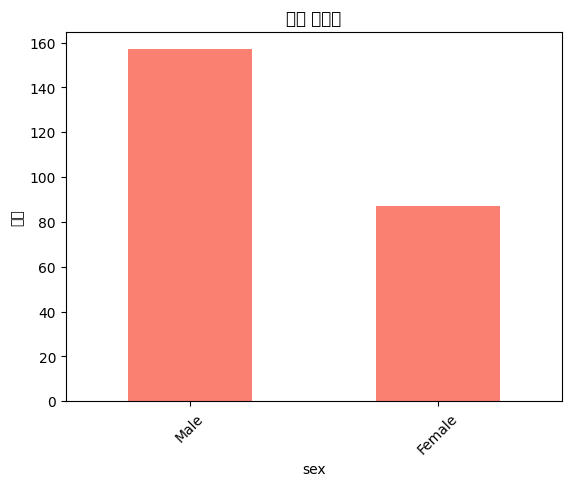

In [8]:
%matplotlib inline
# 성별 고객수
v = tips['sex'].value_counts()
v.plot(kind='bar', rot=45, color="salmon")  # rot = index 기울기

# pandas는 내부적으로 matplotlib 사용해서 그래프를 그린다.
# 그래서 추가 설정은 plot()의 파라미터로 전달  또는 matplotlib의 함수 사용할 수있다.
plt.title("성별 고객수")
plt.ylabel("수량")
plt.show()

/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{

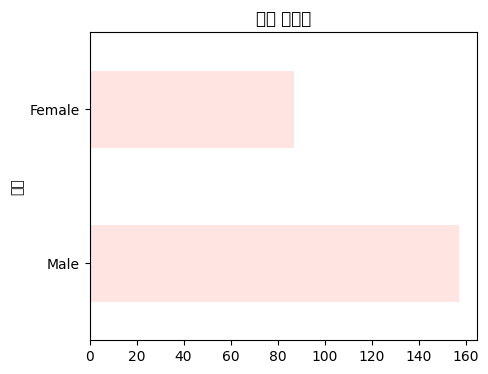

In [9]:
%matplotlib inline
v.plot(kind='barh', title="성별 고객수", ylabel='개수', figsize=(5, 4), color="mistyrose")
plt.show()

In [10]:
# 성별-흡연여부별 손님 수
result = tips.pivot_table(index="sex", columns="smoker", values="total_bill", aggfunc="count")
result

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


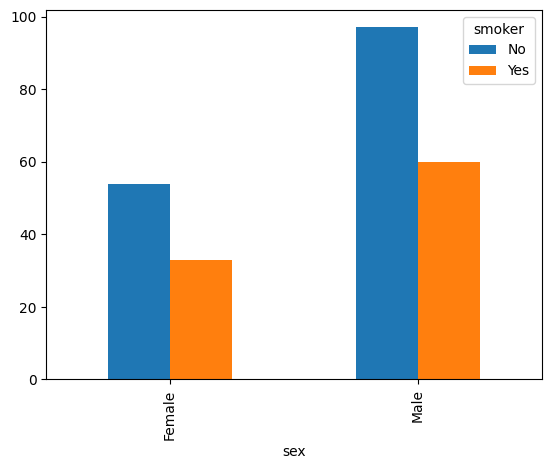

In [11]:
result.plot(kind='bar') 
plt.show()

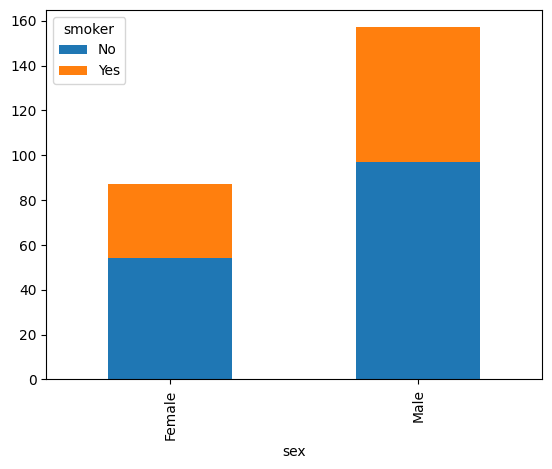

In [12]:
result.plot(
    kind='bar', 
    stacked=True #  막대: 전체 개수, smoker 별 비율로 나눠줌. 기본 stacked=False
)
plt.show()

In [13]:
result = tips.pivot_table(index="smoker", columns='day', values='total_bill', aggfunc="sum")
result

day,Fri,Sat,Sun,Thur
smoker,,,,
No,73.68,884.78,1168.88,770.09
Yes,252.20,893.62,458.28,326.24


/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


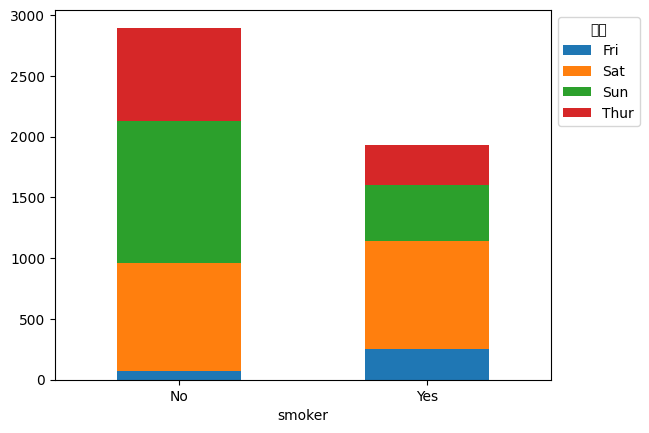

In [14]:
# result.plot(kind='bar')
result.plot(kind='bar', stacked=True, rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="요일")
plt.show()

## 파이차트

In [15]:
tips['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

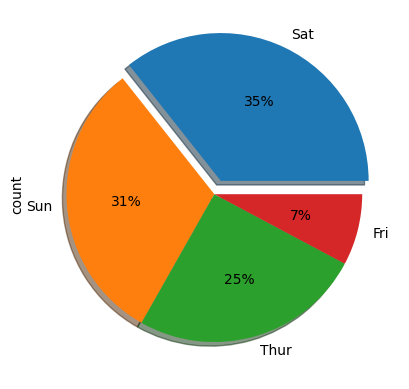

In [16]:
tips['day'].value_counts().plot(
    kind='pie', autopct="%d%%",
    explode=[0.1, 0, 0, 0], shadow=True
)
plt.show()

## 히스토그램, KDE(밀도그래프)

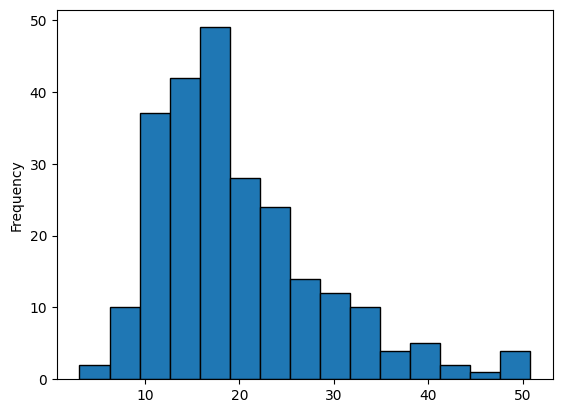

In [2]:
tips['total_bill'].plot(
    kind="hist", 
    bins=15, 
    edgecolor="k"  # 경계선 k=black
)
plt.show()

In [ ]:
!uv pip install scipy

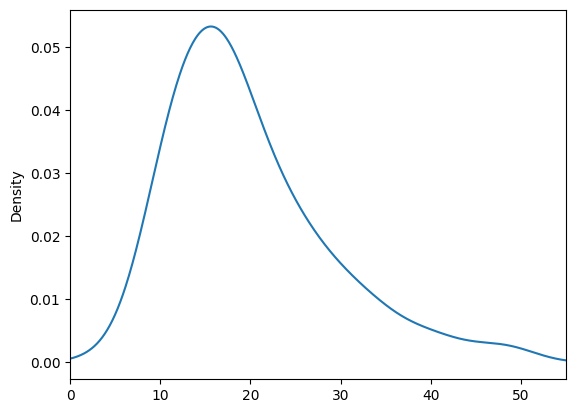

In [3]:
tips['total_bill'].plot(kind="kde") 
plt.xlim(0, 55)
plt.show()

In [4]:
tips[['tip', 'total_bill']]

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
...,...,...
239,5.92,29.03
240,2.00,27.18
241,2.00,22.67
242,1.75,17.82


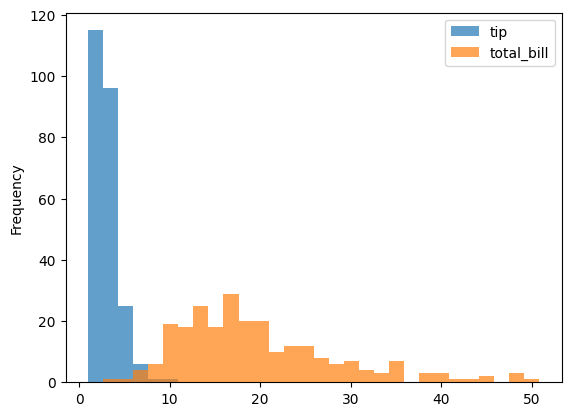

In [5]:
tips[['tip', 'total_bill']].plot(kind='hist', alpha=0.7, bins=30)
plt.show()

## Boxplot (상자그래프)

In [ ]:
tips['total_bill'].plot(kind="box", figsize=(4, 3))
plt.show()

In [ ]:
tips['total_bill'].plot(kind="box", whis=0.5, figsize=(4, 3))
plt.show()

In [ ]:
tips[['tip', 'total_bill']].plot(kind="box")
plt.show()

## scatter plot (산점도) 

In [ ]:
tips.plot(kind="scatter", x="tip", y="total_bill", alpha=0.5)
plt.show()

In [ ]:
tips[['tip', 'total_bill']].corr()

In [ ]:
dia = pd.read_csv("data/diamonds.csv")
v = dia.select_dtypes(include="number").corr()
v

### 컬럼 간 상관계수 시각화
- matplotlib의 imshow()를 이용해 그린다.

In [ ]:
plt.imshow(v, cmap="Blues")
plt.colorbar()
plt.show()

In [ ]:
from PIL import Image
import numpy as np
img = np.array(Image.open("image.jpg"))
plt.imshow(img)
plt.show()

In [ ]:
print(img)

# line plot

In [4]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절").T
df

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9
2014,215.9,599.8,293.1,76.9
2015,223.2,387.1,247.7,109.1
2016,312.8,446.2,381.6,108.1
2017,118.6,609.7,172.5,75.6


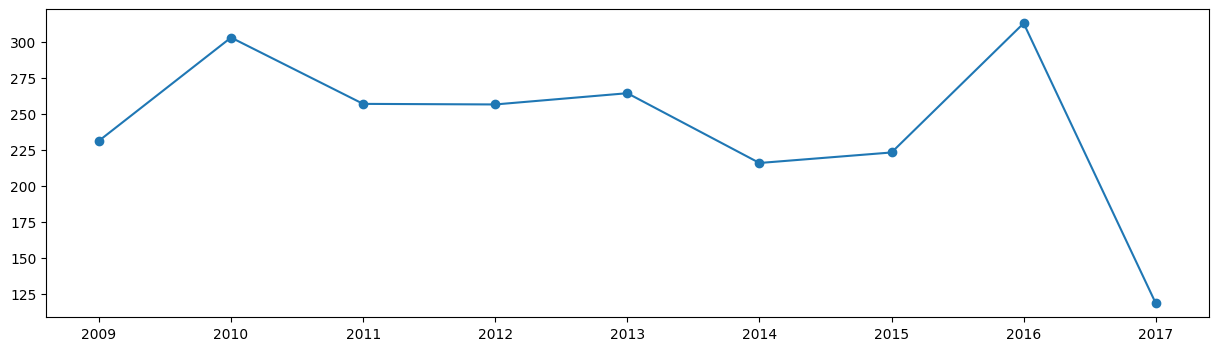

In [ ]:
df['봄'].plot(figsize=(15, 4), marker="o")  # marker="o" 지점에 점 찍는 것. ., o, ^, *
plt.show()

/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/si

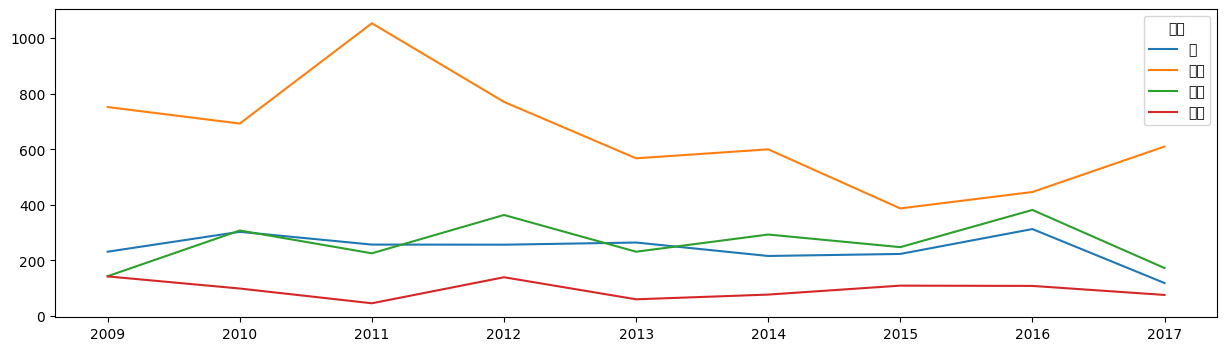

In [15]:
%matplotlib inline

df.plot(figsize=(15,4));
plt.show()

In [8]:
df.T

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jiyouxg/Desktop/SKN21_mjy/05_시각화/.venv/lib/python3.13/sit

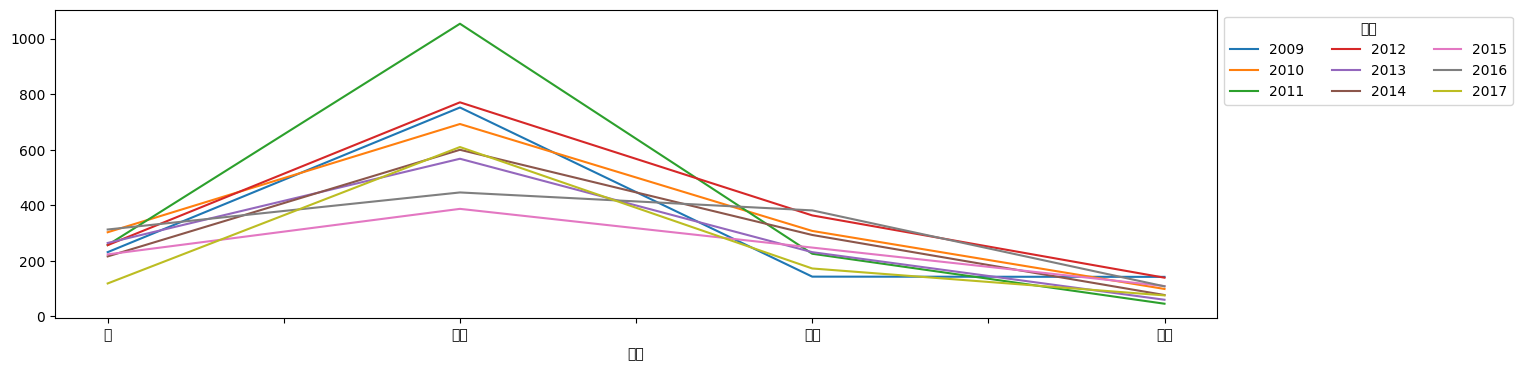

In [ ]:
df.T.plot(figsize=(15,4))
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title="년도", ncols=3) # ncols=3 : 범례 3줄로 출력.
plt.show()